In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

### Рассматривается следующая параметрическая модель: $𝑋_1, ..., 𝑋_𝑁$ — выборка из распределения 𝑁(𝜃, 1). Известно, что 𝜃 близко к нулю: с вероятностью не менее 0.95 выполнено неравенство |𝜃| < 0.5.

В чём суть байесовского метода? Выжать как можно информации (из экспертов, условия задачи, гороскопа, etc.) о том, как ведёт себя $\theta$ и использовать её. 

### Посмотрим, что можно сказать про априорное распределение $\theta$ :

Общеизвестно, что в интервал $[-2\sigma_0, 2\sigma_0]$ при $N(\mu_0,\sigma_0^2)$ входит около 95% выборки

Значит, логично предположить, что априорное распределение - нормальное.

Тогда мы знаем кое-что о его дисперсии:

$\rightarrow 2\sigma_0 = 0.5 \rightarrow \sigma_0 = 0.25$ 

В качестве $\mu_0$ возьмём 0, потому что можем.

Значит, $\theta \sim N(\mu_0, \sigma_0^2)=$ N( 0, 0.0625 ) - априорное распределение $\theta$

### Сгенерируйте выборку размера 100 из распределения Коши с нулевым параметром сдвига и с параметром масштаба равным 1. При 𝑁 = 100 используйте эту выборку в качестве $𝑋_1, ..., 𝑋_𝑁$ для описанной выше модели. 

### Посчитайте байесовские оценки (для одного априорного распределения, учитывающего описанное выше свойство) и оценки максимального правдоподобия для всех $𝑛 \leqslant 100$. Постройте графики абсолютной  величины отклонения этих оценкок от истинного значения параметра $\theta_0 = 0$ в зависимости от 𝑛. Сделайте выводы.

Знаем, что $\sigma$ = 1 для исходной выборки. Получим байесовскую оценку $\theta$.

Как и в предыдущей задаче, апостериорное - сопряженное к априорному нормальное с параметрами :

$\left.\left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}\right)\right/\left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right),\, \left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1}$ 

$ = 
\left.\left(\frac{\sum_{i=1}^{n} x_i}{\sigma^2}\right)\right/\left(\frac{1}{0.0625} + \frac{n}{\sigma^2}\right),\, \left(\frac{1}{0.0625} + \frac{n}{\sigma^2}\right)^{-1}
$

Мы хотим получить условное матожидание апостериорного при данной выборке, то есть

$ \theta^* =  \frac{\sum_{i=1}^{n} x_i}{\frac{1}{0.0625} + n} $

In [13]:
big_sample = sts.cauchy.rvs(loc=0., scale=1., size=100)

In [14]:
sigma_0 = 0.25
def bayes_estimator(X_array):
    return np.sum(X_array)*1./(sigma_0**-2. + 1.*len(X_array))

def likelihood_estimator(X_array):
    return np.mean(X_array)

In [15]:
bayes_values = []
likelihood_values = []

for i in np.arange(1, len(big_sample)):
    sample = big_sample[:i]
    bayes_values.append(bayes_estimator(sample))
    likelihood_values.append(likelihood_estimator(sample))

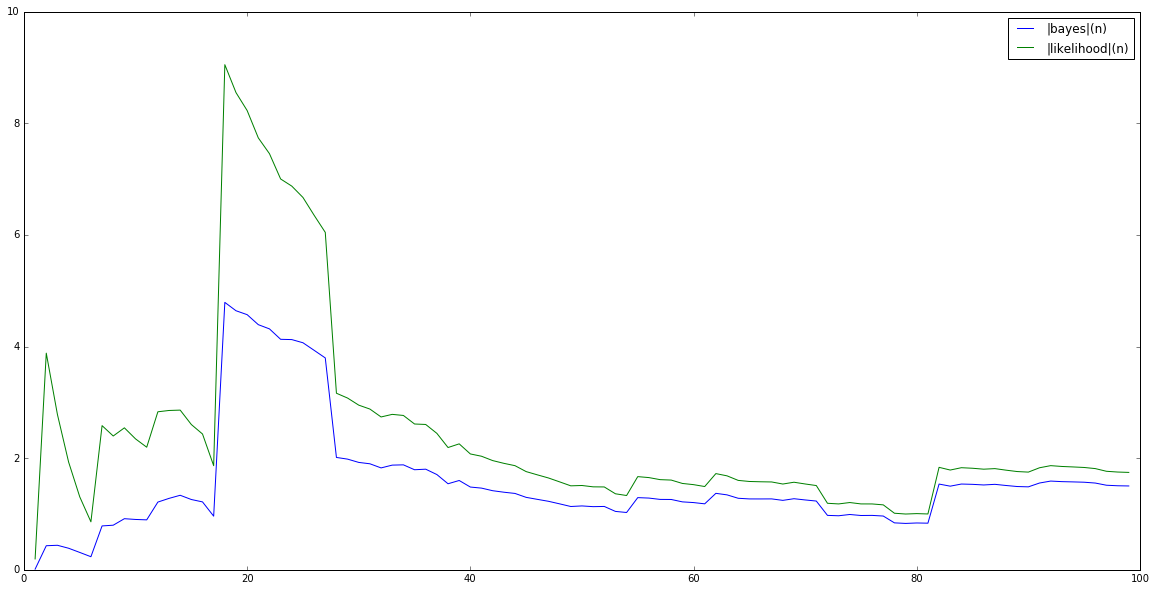

In [16]:
X = np.arange(1, 100)

# Y = [np.abs(likelihood_values[i-1] - bayes_values[i-1]) 
#      for i in np.arange(1, len(big_sample))
#     ]

plt.figure(figsize=(20,10))
trash = plt.plot(X, np.abs(bayes_values), label='|bayes|(n)')
trash = plt.plot(X, np.abs(likelihood_values), label='|likelihood|(n)')

plt.legend()

### Посмотрим поближе

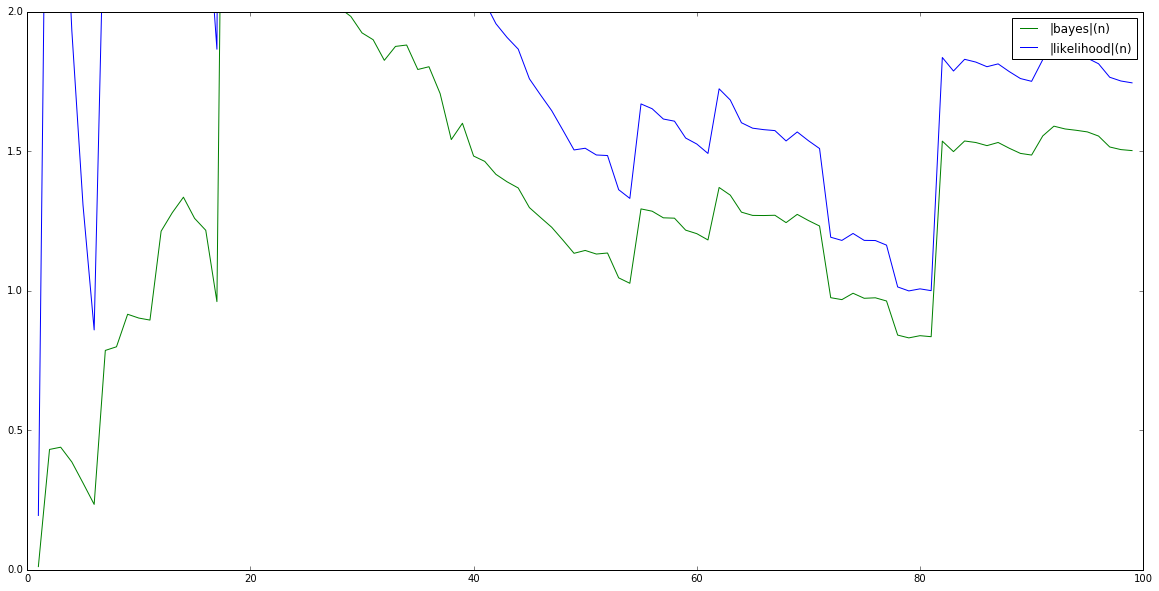

In [17]:
plt.figure(figsize=(20,10))
plt.ylim((0., 2.))
trash = plt.plot(X, np.abs(bayes_values), color='g', label='|bayes|(n)')
trash = plt.plot(X, np.abs(likelihood_values), color='b', label='|likelihood|(n)')

plt.legend()

### Вывод:
Байесовская оценка ведет себя стабильно лучше, чем оценка максимального правдоподобия, потому что мы использовали знание об априорном распределении и обладали большей информацией
Однако оценка всё равно не очень хорошая и происходит по большому счёту бред, потому что мы неверно угадали класс распределения (Коши вместо нормального)